In [1]:
import numpy as np
import epios
from scipy.interpolate import interp1d, make_interp_spline
import matplotlib.pyplot as plt
import pandas as pd
import branchpro
import scipy.stats
from branchpro.apps import ReproductionNumberPlot
import stan
import arviz as az
import nest_asyncio
nest_asyncio.apply()

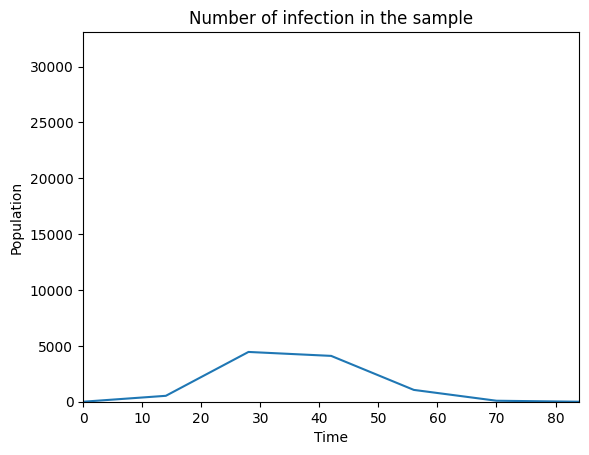

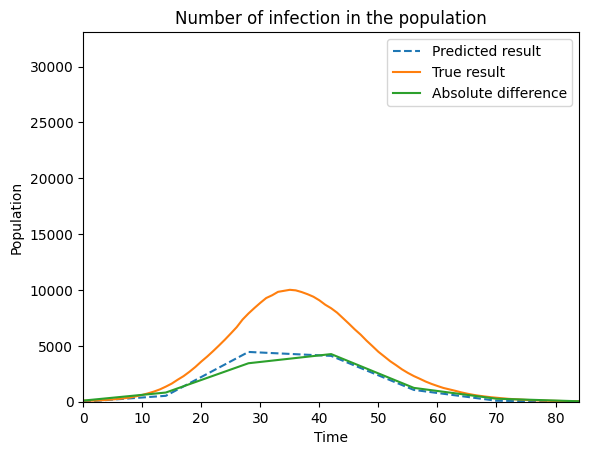

In [2]:
demo_data = pd.read_csv('./demographics_large.csv')
time_data = pd.read_csv('./inf_status_history_large.csv')

# Define the class instance
positivity_curve = pd.read_csv('../EpiPI/PCR_curve_summary.csv')['median'].values
positivity_pos_list = np.arange(1, 31) * 10
positivity_curve = positivity_curve[positivity_pos_list]
practical = epios.PracticalSampler(time_data=time_data, demo_data=demo_data, positivity_curve=positivity_curve)
time_sample=[0, 14, 28, 42, 56, 70, 84]

# Do prediction and comparison based age-region stratification
result, diff = practical.predict_base(sample_size=750,
                                             time_sample=time_sample,
                                             comparison=True,
                                            #  non_responder=False,
                                             gen_plot=True,
                                             sample_strategy='Random',
                                             seed=10)